In [ ]:
#needed pythonlibraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#loading our data set and seperating into train and test set
AAPL_w = pd.read_csv("/content/AAPL-weekly.csv")
AAPLw_train = AAPL_w.iloc[:, 1:2].iloc[0:159, :]
AAPLw_test = AAPL_w.iloc[:, 1:2].iloc[159:210, :]

In [ ]:
len(AAPLw_train), len(AAPLw_test)

(159, 50)

In [ ]:
#min max scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
AAPLd_train_scaled = sc.fit_transform(AAPLw_train)

In [ ]:
X_train = []
y_train = []
for i in range(5, 159):
    X_train.append(AAPLd_train_scaled[i-5:i, 0]) # time steps
    y_train.append(AAPLd_train_scaled[i, 0]) #value at time 30,31,32 up to 159
# So I think its using x_train at each element(which is an array) something to mini train then predict final

X_train, y_train = np.array(X_train), np.array(y_train)
# just makes them arrays

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#X_train

# makes them a 3d array

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
5/5 [==============================] - 7s 14ms/step - loss: 0.3897
Epoch 2/100
5/5 [==============================] - 0s 15ms/step - loss: 0.2916
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1497
Epoch 4/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0451
Epoch 5/100
5/5 [==============================] - 0s 16ms/step - loss: 0.0572
Epoch 6/100
5/5 [==============================] - 0s 16ms/step - loss: 0.0348
Epoch 7/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0460
Epoch 8/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0351
Epoch 9/100
5/5 [==============================] - 0s 16ms/step - loss: 0.0312
Epoch 10/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0304
Epoch 11/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0243
Epoch 12/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0208
Epoch 13/100
5/5 [==============================]

In [ ]:
dataset_total = pd.concat((AAPLw_train['Open'], AAPLw_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(AAPLw_test) - 5 :].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(5, len(inputs)):
    X_test.append(inputs[i-5:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


#dataset_total
#len(dataset_total)
#len(predicted_stock_price)
#len(dataset_total) - len(AAPLd_test) - 60

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2/2 [==============================] - 2s 10ms/step


In [ ]:
len(predicted_stock_price)

50

In [ ]:
k = np.arange(1,51,1)
AAPLw_test_plot = AAPLw_test.set_index(k)
AAPLw_test_plot

,Open
1,136.820007
2,140.889999
3,143.970001
4,153.880005
5,153.110001
6,148.869995
7,146.830002
8,152.809998
9,151.190002
10,159.300003


In [ ]:
error = np.array((AAPLw_test - predicted_stock_price).loc[:, "Open"])
RMSE = np.sqrt(np.mean((error)**2))
error = np.array((AAPLw_test - predicted_stock_price).loc[:, "Open"])
RMSE

14.579721879313277

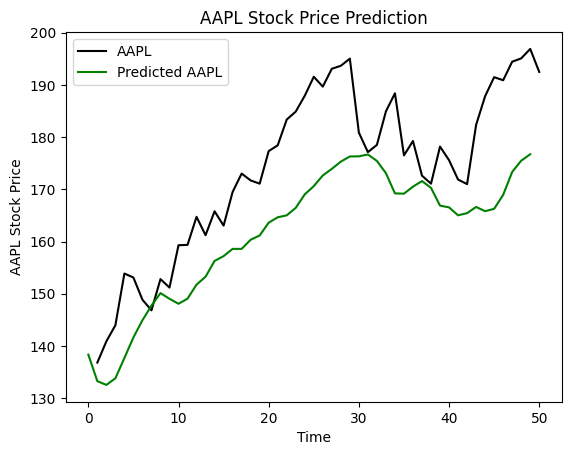

In [ ]:


plt.plot(AAPLw_test_plot, color = 'black', label = 'AAPL')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted AAPL')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

def LSTM_stock_prediction(dataset, num_hidden_layers, units_per_layer, time_steps, train_percent, test_percent, target_column, n_splits=5):
    # Read the dataset
    data = pd.read_csv(dataset)

    # Splitting data into train and test sets
    train_length = int(len(data) * train_percent / 100)
    test_length = int(len(data) * test_percent / 100)
    train_data = data.iloc[:train_length, :]
    test_data = data.iloc[train_length:train_length + test_length, :]

    # Preprocessing
    sc = MinMaxScaler(feature_range=(0,1))
    train_scaled = sc.fit_transform(train_data[target_column].values.reshape(-1, 1))

    X_train = []
    y_train = []
    for i in range(time_steps, len(train_scaled)):
        X_train.append(train_scaled[i-time_steps:i, 0])
        y_train.append(train_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Initialize k-fold cross-validation
    kf = KFold(n_splits=n_splits)

    # Initialize list to store RMSE values
    rmse_values = []

    # Perform k-fold cross-validation
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Building the LSTM model
        model = Sequential()
        for _ in range(num_hidden_layers):
            model.add(LSTM(units=units_per_layer, return_sequences=True, input_shape=(X_train_fold.shape[1], 1)))
            model.add(Dropout(0.2))
        model.add(LSTM(units=units_per_layer))
        model.add(Dropout(0.2))
        model.add(Dense(units=1))
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Training the model
        model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)

        # Making predictions on validation set
        predicted_stock_price = model.predict(X_val_fold)
        predicted_stock_price = sc.inverse_transform(predicted_stock_price)

        # Calculating RMSE for this fold
        error = np.array((sc.inverse_transform(y_val_fold.reshape(-1, 1)) - predicted_stock_price[:, 0]))
        fold_rmse = np.sqrt(np.mean(error**2))
        rmse_values.append(fold_rmse)

    # Calculate mean RMSE across all folds
    mean_rmse = np.mean(rmse_values)

    # Training the final model on full training data
    model = Sequential()
    for _ in range(num_hidden_layers):
        model.add(LSTM(units=units_per_layer, return_sequences=True, input_shape=(X_train.shape[1], 1)))
        model.add(Dropout(0.2))
    model.add(LSTM(units=units_per_layer))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Making predictions on test set
    dataset_total = pd.concat((train_data[target_column], test_data[target_column]), axis=0)
    inputs = dataset_total[len(dataset_total) - len(test_data) - time_steps:].values.reshape(-1,1)
    inputs = sc.transform(inputs)
    X_test = []
    for i in range(time_steps, len(inputs)):
        X_test.append(inputs[i-time_steps:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    # Create a DataFrame for predicted prices
    predicted_df = pd.DataFrame({
        'Date': test_data.index,
        'Actual_Price': test_data[target_column].values,
        'Predicted_Price': predicted_stock_price[:, 0]
    })

    # Calculating RMSE on test set
    error = np.array((test_data[target_column].values - predicted_stock_price[:, 0]))
    final_rmse = np.sqrt(np.mean(error**2))

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(test_data.index, test_data[target_column], color='black', label='Actual Stock Price')
    plt.plot(test_data.index, predicted_stock_price[:, 0], color='green', label='Predicted Stock Price')

    # Add mean and final RMSE to the plot title
    plt.title(f'Stock Price Prediction\nMean RMSE: {mean_rmse:.2f}, Final RMSE: {final_rmse:.2f}')

    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

    return mean_rmse, final_rmse, predicted_df


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


2/2 [==============================] - 3s 10ms/step


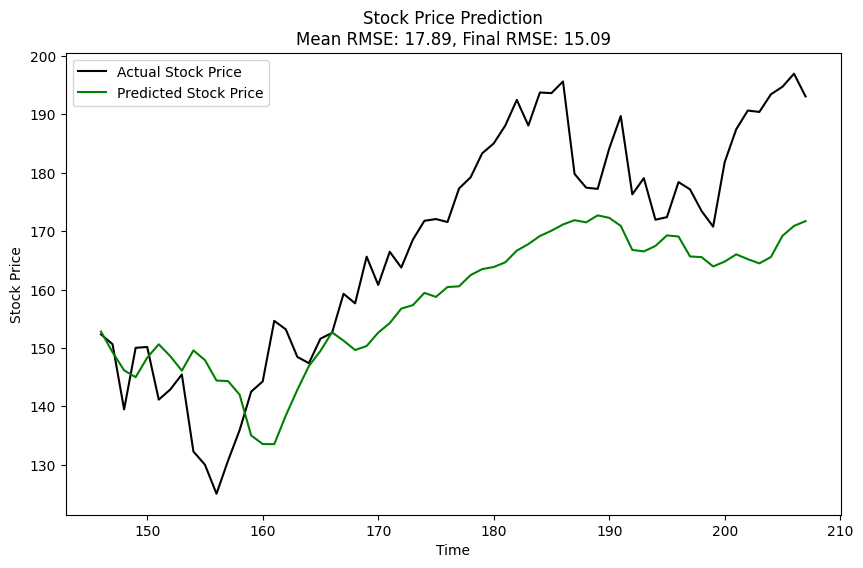

Mean RMSE: 17.89, Final RMSE: 15.09
    Date  Actual_Price  Predicted_Price
0    146    152.339996       152.813339
1    147    150.649994       149.284225
2    148    139.500000       146.181732
3    149    150.039993       145.013077
4    150    150.179993       148.356400
..   ...           ...              ...
57   203    190.399994       164.485184
58   204    193.419998       165.571472
59   205    194.710007       169.192108
60   206    196.940002       170.891602
61   207    193.050003       171.718063

[62 rows x 3 columns]


In [ ]:
# Example call to LSTM_stock_prediction function
mean_rmse, final_rmse, predicted_prices = LSTM_stock_prediction(
    dataset="/content/AAPL-weekly.csv",
    num_hidden_layers=5,
    units_per_layer=50,
    time_steps=5,
    train_percent=70,
    test_percent=30,
    target_column='Close'
)

print(f'Mean RMSE: {mean_rmse:.2f}, Final RMSE: {final_rmse:.2f}')
print(predicted_prices)


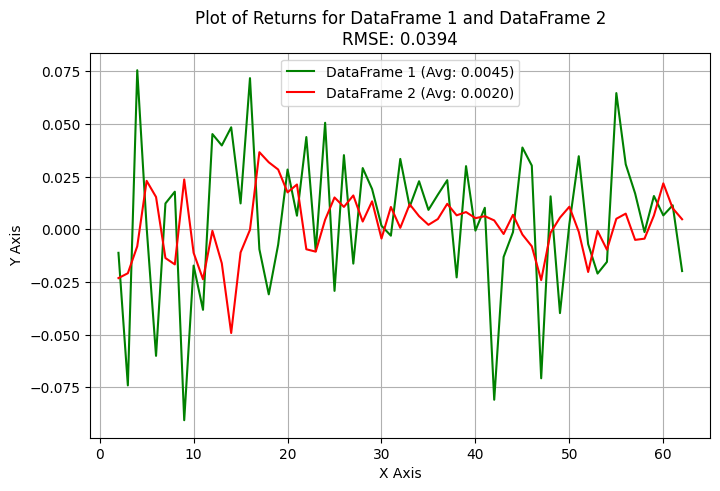

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def calculate_and_plot_returns(df1, df2):
    # Calculate returns for df1
    df1['Close_Lag'] = df1.iloc[:, 0].shift(1)
    df1['Returns'] = (df1.iloc[:, 0] - df1['Close_Lag']) / df1['Close_Lag']

    # Calculate returns for df2
    df2['Close_Lag'] = df2.iloc[:, 0].shift(1)
    df2['Returns'] = (df2.iloc[:, 0] - df2['Close_Lag']) / df2['Close_Lag']

    # Calculate RMSE between the two DataFrames
    rmse = np.sqrt(mean_squared_error(df1['Returns'].dropna(), df2['Returns'].dropna()))

    # Calculate averages
    avg_df1 = np.average(df1['Returns'].dropna())
    avg_df2 = np.average(df2['Returns'].dropna())

    # Sample data for plotting
    x_values = np.arange(1, len(df1) + 1)
    y1_values = df1['Returns']
    y2_values = df2['Returns']

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(x_values, y1_values, linestyle='-', color='green', label=f'DataFrame 1 (Avg: {avg_df1:.4f})')
    plt.plot(x_values, y2_values, linestyle='-', color='red', label=f'DataFrame 2 (Avg: {avg_df2:.4f})')
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title(f'Plot of Returns for DataFrame 1 and DataFrame 2\nRMSE: {rmse:.4f}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
# Assuming df1 and df2 are your two DataFrames with single columns each
df1 = pd.DataFrame(predicted_prices.iloc[:, 1])
df2 = pd.DataFrame(predicted_prices.iloc[:, 2])
calculate_and_plot_returns(df1, df2)

1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


2/2 [==============================] - 2s 10ms/step


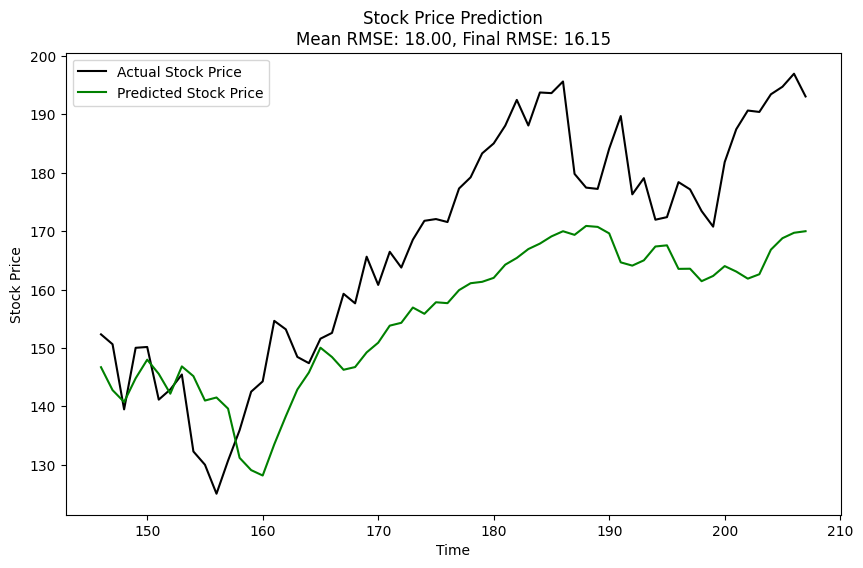

Mean RMSE: 18.00, Final RMSE: 16.15
    Date  Actual_Price  Predicted_Price
0    146    152.339996       146.719879
1    147    150.649994       142.797470
2    148    139.500000       140.769424
3    149    150.039993       144.825089
4    150    150.179993       148.004242
..   ...           ...              ...
57   203    190.399994       162.627441
58   204    193.419998       166.833740
59   205    194.710007       168.794037
60   206    196.940002       169.721695
61   207    193.050003       169.991699

[62 rows x 3 columns]


In [ ]:
# Example call to LSTM_stock_prediction function
mean_rmse, final_rmse, predicted_prices = LSTM_stock_prediction(
    dataset="/content/AAPL-weekly.csv",
    num_hidden_layers=5,
    units_per_layer=50,
    time_steps=4,
    train_percent=70,
    test_percent=30,
    target_column='Close'
)

print(f'Mean RMSE: {mean_rmse:.2f}, Final RMSE: {final_rmse:.2f}')
print(predicted_prices)